#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Load Data

In [4]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Transform Data

In [6]:
# Add Remap "Gender" Column
data["Gender_Mapped"] = data["Gender"].map({"Male":1, "Female":0})
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Mapped
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [7]:
# Log transformation "EstimatedSalary"
data["SqRt_Salary"] = np.sqrt(data["EstimatedSalary"])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Mapped,SqRt_Salary
0,15624510,Male,19,19000,0,1,137.840488
1,15810944,Male,35,20000,0,1,141.421356
2,15668575,Female,26,43000,0,0,207.364414
3,15603246,Female,27,57000,0,0,238.746728
4,15804002,Male,19,76000,0,1,275.680975


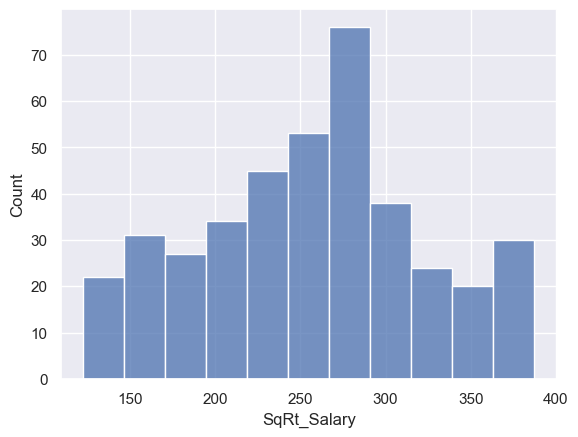

In [8]:
# Plot transformed data
sns.histplot(data, x="SqRt_Salary")
plt.show()

In [9]:
# Scale "EstimatedSalary" and "Age" columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# Scale "EstimatedSalary" and "Age" columns
columns_to_scale = data[["Age", "SqRt_Salary"]]
scaler.fit(columns_to_scale)
data[["Age_Scaled", "Sqrt_Salary_Scaled"]] = scaler.fit_transform(columns_to_scale)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Mapped,SqRt_Salary,Age_Scaled,Sqrt_Salary_Scaled
0,15624510,Male,19,19000,0,1,137.840488,-1.781797,-1.785227
1,15810944,Male,35,20000,0,1,141.421356,-0.253587,-1.730989
2,15668575,Female,26,43000,0,0,207.364414,-1.113206,-0.732165
3,15603246,Female,27,57000,0,0,238.746728,-1.017692,-0.256825
4,15804002,Male,19,76000,0,1,275.680975,-1.781797,0.302609


In [11]:
# Scale "EstimatedSalary" and "Age" columns
columns_to_scale = data[["Age", "EstimatedSalary"]]
scaler.fit(columns_to_scale)
data[["Age_Scaled", "Salary_Scaled"]] = scaler.fit_transform(columns_to_scale)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Mapped,SqRt_Salary,Age_Scaled,Sqrt_Salary_Scaled,Salary_Scaled
0,15624510,Male,19,19000,0,1,137.840488,-1.781797,-1.785227,-1.490046
1,15810944,Male,35,20000,0,1,141.421356,-0.253587,-1.730989,-1.460681
2,15668575,Female,26,43000,0,0,207.364414,-1.113206,-0.732165,-0.785290
3,15603246,Female,27,57000,0,0,238.746728,-1.017692,-0.256825,-0.374182
4,15804002,Male,19,76000,0,1,275.680975,-1.781797,0.302609,0.183751


#### Export For Model

In [28]:
# Rearracnge columns
data_for_model = data[['Gender_Mapped', 'Age_Scaled', 'Sqrt_Salary_Scaled', 'Purchased']]

In [30]:
# Export processed data for modeling
data_for_model.to_csv("processed_data.txt", sep="|", index=False)

In [32]:
# Save "scaler" object for use in "Modeling" notebook
%store scaler

Stored 'scaler' (StandardScaler)
